In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Import the dataset

> Don't forget about setting the proper encoding

In [2]:
sk_projects = pd.read_csv('datasets/mapapodporenychprojektov.csv',
                          encoding='cp1250',
                          sep=';')

In [3]:
sk_projects.head()

ITMS kód projektu:                      Skrátený názov projektu:  \
0         27110130001               Podpora zamestn. uch o.zamestn.   
1         27110130002        Podp. zamestn. obč. so zdrav. postihn.   
2         27110130003            Aktivácia uchádzačov o zamestnanie   
3         27110130004       Národný projekt XXI-2 Ukazovatele a sys   
4         27110130005  Zlepšenie a zvýšenie dostupnosti služieb zam   

                        Subjekt: Stav projektu: Celková zazmluvnená suma EUR:  \
0                         UPSVaR   v realizácii             83 348 257,32 EUR   
1                         UPSVaR   v realizácii             32 118 352,91 EUR   
2                         UPSVaR   v realizácii             69 707 229,63 EUR   
3  Centrum vzdelávania MPSVaR SR   v realizácii                346 034,16 EUR   
4                         UPSVaR   v realizácii             10 795 747,00 EUR   

                         Spôsob realizácie projektu:  Opatrenie - kód:  \
0  Projekt bude realizovaný Ústredím práce, sociá...               101   
1  Projekt bude realizovaný Ústredím práce, sociá...               101   
2  Projekt bude realizovať Ústredie práce, sociál...               101   
3  Predkladaný projekt bude realizovaný na celom ...               101   
4  Projekt bude realizovaný Ústredím PSVR a úradm...               101   

  Typ: (NP/DOP/PP)       Kontakt na orgán RO/SORO  \
0               NP  http://www.esf.gov.sk      RO   
1               NP  http://www.esf.gov.sk      RO   
2               NP  http://www.esf.gov.sk      RO   
3               NP  http://www.esf.gov.sk      RO   
4               NP  http://www.esf.gov.sk      RO   

                          ...                                 DIČ  \
0                         ...                          2021777780   
1                         ...                          2021777780   
2                         ...                          2021777780   
3                         ...                          2021828457   
4                         ...                          2021777780   

                      Adresa prijímateľa                    Právna forma  \
0   Bratislava-Staré Mesto, Špitálska, 8   Štátna rozpočtová organizácia   
1   Bratislava-Staré Mesto, Špitálska, 8   Štátna rozpočtová organizácia   
2   Bratislava-Staré Mesto, Špitálska, 8   Štátna rozpočtová organizácia   
3  Bratislava-Nové Mesto, Pekná cesta, 6  Štátna príspevková organizácia   
4   Bratislava-Staré Mesto, Špitálska, 8   Štátna rozpočtová organizácia   

        Výzva / Vyzvanie:                  GPS  \
0   OP ZaSI NP 2008/1/1.1  48.147348,17.116872   
1   OP ZaSI NP 2008/1/1.1  48.147330,17.116522   
2   OP ZaSI NP 2008/1/1.1  48.147238,17.116591   
3  OP ZaSI NP 2009/1.1/02   48.19821,17.137918   
4  OP ZaSI NP 2009/1.1/02  48.147239,17.116692   

  Počet novovytvorených pracovných miest  \
0                                41238.0   
1                                 4574.0   
2                                    NaN   
3                                    NaN   
4                                    NaN   

  Počet osôb cieľovej skupiny zapojených do podporených projektov  \
0                                           134908.0                
1                                            35404.0                
2                                           617138.0                
3                                                0.0                
4                                                0.0                

  Počet osôb zahrnutých do vzdelávacích aktivít  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                         128.0   
4                                           NaN   

   Počet osôb, ktoré využívajú služby sociálnych pracovníkov a ich   \
0                                                NaN                  
1                      

### Data cleaning

First of all study the dataset! Which items are necessary, which of them are useless for you analysis

Remove unnecesary columns
- Check the column names and pick those, which are not needed for our analysis

In [4]:
sk_projects.columns

Index(['ITMS kód projektu:', 'Skrátený názov projektu:', 'Subjekt:',
       'Stav projektu:', 'Celková zazmluvnená suma EUR:',
       'Spôsob realizácie projektu:', 'Opatrenie - kód:', 'Typ: (NP/DOP/PP)',
       'Kontakt na orgán', 'RO/SORO', 'VÚC', 'Okres', 'Obec', 'Prioritná os',
       'Opatrenie', 'ZACIATOK', 'KONIEC', 'Názov prijímateľa:', 'IČO', 'DIČ',
       'Adresa prijímateľa', 'Právna forma', 'Výzva / Vyzvanie:', 'GPS',
       'Počet novovytvorených pracovných miest',
       'Počet osôb cieľovej skupiny zapojených do podporených projektov',
       'Počet osôb zahrnutých do vzdelávacích aktivít',
       'Počet osôb, ktoré využívajú služby sociálnych pracovníkov a ich ',
       'Počet úspešne umiestnených uchádzačov o zamestnanie'],
      dtype='object')

In [5]:
columns_to_remove = ['Spôsob realizácie projektu:',
                     'Opatrenie - kód:',
                     'Typ: (NP/DOP/PP)',
                     'Kontakt na orgán',
                     'RO/SORO',
                     'Prioritná os',
                     'Opatrenie',
                     'IČO',
                     'DIČ',
                     'Výzva / Vyzvanie:']

In [6]:
sk_projects.drop(labels=columns_to_remove, axis=1, inplace=True)

In [7]:
sk_projects.columns

Index(['ITMS kód projektu:', 'Skrátený názov projektu:', 'Subjekt:',
       'Stav projektu:', 'Celková zazmluvnená suma EUR:', 'VÚC', 'Okres',
       'Obec', 'ZACIATOK', 'KONIEC', 'Názov prijímateľa:',
       'Adresa prijímateľa', 'Právna forma', 'GPS',
       'Počet novovytvorených pracovných miest',
       'Počet osôb cieľovej skupiny zapojených do podporených projektov',
       'Počet osôb zahrnutých do vzdelávacích aktivít',
       'Počet osôb, ktoré využívajú služby sociálnych pracovníkov a ich ',
       'Počet úspešne umiestnených uchádzačov o zamestnanie'],
      dtype='object')

Try to figure out resonable (and more important shorter) names for the columns

In [8]:
column_renaming = {
    'ITMS kód projektu:': 'Project_ID',
    'Skrátený názov projektu:': 'kratky nazov',
    'Subjekt:': 'Subjekt',
    'Stav projektu:': 'Stav projektu',
    'Celková zazmluvnená suma EUR:': 'Suma[EUR]',
    'VÚC': 'VUC',
    'Názov prijímateľa:': 'Nazov prijimatela',
    'Adresa prijímateľa': 'Adresa prijimatela',
    'Právna forma': 'Pravna forma',
    'Počet novovytvorených pracovných miest': 'nove prac. miesta',
    'Počet osôb cieľovej skupiny zapojených do podporených projektov': 'pocet zapojenych',
    'Počet osôb zahrnutých do vzdelávacích aktivít': 'pocet vzdelav.',
    'Počet osôb, ktoré využívajú služby sociálnych pracovníkov a ich ': 'pocet social. sluz.',
    'Počet úspešne umiestnených uchádzačov o zamestnanie': 'pocet uspesne umiest.'
}

In [9]:
sk_projects.rename(columns=column_renaming, inplace=True)

In [10]:
sk_projects.head()

Project_ID                                  kratky nazov  \
0  27110130001               Podpora zamestn. uch o.zamestn.   
1  27110130002        Podp. zamestn. obč. so zdrav. postihn.   
2  27110130003            Aktivácia uchádzačov o zamestnanie   
3  27110130004       Národný projekt XXI-2 Ukazovatele a sys   
4  27110130005  Zlepšenie a zvýšenie dostupnosti služieb zam   

                         Subjekt Stav projektu          Suma[EUR]  \
0                         UPSVaR  v realizácii  83 348 257,32 EUR   
1                         UPSVaR  v realizácii  32 118 352,91 EUR   
2                         UPSVaR  v realizácii  69 707 229,63 EUR   
3  Centrum vzdelávania MPSVaR SR  v realizácii     346 034,16 EUR   
4                         UPSVaR  v realizácii  10 795 747,00 EUR   

                 VUC             Okres                                  Obec  \
0  Bratislavský kraj  Okres Bratislava    Bratislava-Nové Mesto, Špitálska 8   
1  Bratislavský kraj  Okres Bratislava    Bratislava-Nové Mesto, Špitálska 8   
2  Bratislavský kraj  Okres Bratislava    Bratislava-Nové Mesto, Špitálska 8   
3  Bratislavský kraj  Okres Bratislava  Bratislava-Nové Mesto, Pekná cesta 6   
4  Bratislavský kraj  Okres Bratislava    Bratislava-Nové Mesto, Špitálska 8   

    ZACIATOK      KONIEC                                  Nazov prijimatela  \
0   1.3.2008   31.8.2012           Ústredie práce, sociálnych vecí a rodiny   
1   1.3.2008  31.12.2012           Ústredie práce, sociálnych vecí a rodiny   
2   1.4.2008   30.6.2013           Ústredie práce, sociálnych vecí a rodiny   
3   1.5.2009   15.8.2010  Centrum vzdelávania Ministerstva práce, sociál...   
4  21.5.2009   31.8.2012           Ústredie práce, sociálnych vecí a rodiny   

                      Adresa prijimatela                    Pravna forma  \
0   Bratislava-Staré Mesto, Špitálska, 8   Štátna rozpočtová organizácia   
1   Bratislava-Staré Mesto, Špitálska, 8   Štátna rozpočtová organizácia   
2   Bratislava-Staré Mesto, Špitálska, 8   Štátna rozpočtová organizácia   
3  Bratislava-Nové Mesto, Pekná cesta, 6  Štátna príspevková organizácia   
4   Bratislava-Staré Mesto, Špitálska, 8   Štátna rozpočtová organizácia   

                   GPS  nove prac. miesta  pocet zapojenych  pocet vzdelav.  \
0  48.147348,17.116872            41238.0          134908.0             NaN   
1  48.147330,17.116522             4574.0           35404.0             NaN   
2  48.147238,17.116591                NaN          617138.0             NaN   
3   48.19821,17.137918                NaN               0.0           128.0   
4  48.147239,17.116692                NaN               0.0             NaN   

   pocet social. sluz.  pocet uspesne umiest.  
0                  NaN                    NaN  
1                  NaN                17710.0  
2                  NaN                    NaN  
3                  NaN                    NaN  
4                  NaN                    NaN

Convert `Suma[EUR]` column to float numbers

> There are multiple ways to do it

In [11]:
sk_projects['Suma[EUR]'] = (sk_projects['Suma[EUR]'].replace(' EUR', '', regex=True)
                                                    .replace(',', '.', regex=True)
                                                    .replace(' ', '', regex=True)
                                                    .astype(float))

## Data exploration

`Dataframe.describe()` shows us som basic statistics about the numeric columns in the dataset

In [12]:
sk_projects.describe()

Project_ID     Suma[EUR]  nove prac. miesta  pocet zapojenych  \
count  1.551000e+03  1.551000e+03         238.000000       1404.000000   
mean   2.711903e+10  6.531625e+05         319.747899       1375.574786   
std    9.623129e+06  3.983707e+06        2947.932147      24499.255116   
min    2.711013e+10  5.425610e+03           0.000000          0.000000   
25%    2.711023e+10  5.748810e+04           3.000000          0.000000   
50%    2.712013e+10  1.212574e+05           6.000000         30.000000   
75%    2.712023e+10  2.290590e+05          13.000000        220.500000   
max    2.714013e+10  8.334826e+07       41238.000000     665026.000000   

       pocet vzdelav.  pocet social. sluz.  pocet uspesne umiest.  
count      332.000000           332.000000               6.000000  
mean       181.864458           507.825301            6263.000000  
std        987.548876           680.977132            7259.018556  
min          0.000000             8.000000               0.000000  
25%         15.000000           124.500000             197.250000  
50%         40.000000           261.500000            4600.000000  
75%         96.250000           637.500000           10103.750000  
max      14718.000000          6000.000000           17710.000000

> As you can see, some of the numeric columns are represented in scientific notation - It is not very informative when we are talking about money :). We can turn off this behavior by the `pd.options.display.float_format` option

In [13]:
pd.options.display.float_format = '{:.2f}'.format

In [14]:
sk_projects.describe()

Project_ID   Suma[EUR]  nove prac. miesta  pocet zapojenych  \
count        1551.00     1551.00             238.00           1404.00   
mean  27119028809.08   653162.52             319.75           1375.57   
std       9623129.41  3983707.48            2947.93          24499.26   
min   27110130001.00     5425.61               0.00              0.00   
25%   27110230371.50    57488.10               3.00              0.00   
50%   27120130145.00   121257.39               6.00             30.00   
75%   27120230012.50   229059.00              13.00            220.50   
max   27140130194.00 83348257.32           41238.00         665026.00   

       pocet vzdelav.  pocet social. sluz.  pocet uspesne umiest.  
count          332.00               332.00                   6.00  
mean           181.86               507.83                6263.00  
std            987.55               680.98                7259.02  
min              0.00                 8.00                   0.00  
25%             15.00               124.50                 197.25  
50%             40.00               261.50                4600.00  
75%             96.25               637.50               10103.75  
max          14718.00              6000.00               17710.00

Let's check out the data types of the individual columns

In [15]:
sk_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 19 columns):
Project_ID               1551 non-null int64
kratky nazov             1551 non-null object
Subjekt                  1551 non-null object
Stav projektu            1551 non-null object
Suma[EUR]                1551 non-null float64
VUC                      1551 non-null object
Okres                    1549 non-null object
Obec                     1548 non-null object
ZACIATOK                 1551 non-null object
KONIEC                   1551 non-null object
Nazov prijimatela        1551 non-null object
Adresa prijimatela       1551 non-null object
Pravna forma             1551 non-null object
GPS                      1551 non-null object
nove prac. miesta        238 non-null float64
pocet zapojenych         1404 non-null float64
pocet vzdelav.           332 non-null float64
pocet social. sluz.      332 non-null float64
pocet uspesne umiest.    6 non-null float64
dtypes: float64(6), 

Let's check how the subsidies from EU are distributed

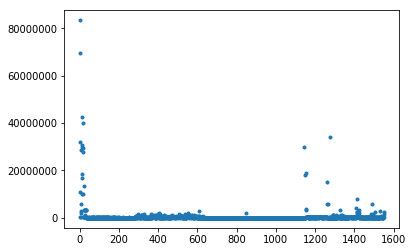

In [16]:
fig, ax = plt.subplots()

ax.plot(sk_projects['Suma[EUR]'], '.')
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

A scatter plot doesn't tell you too much about the distribution. A histogram is much more intuitive

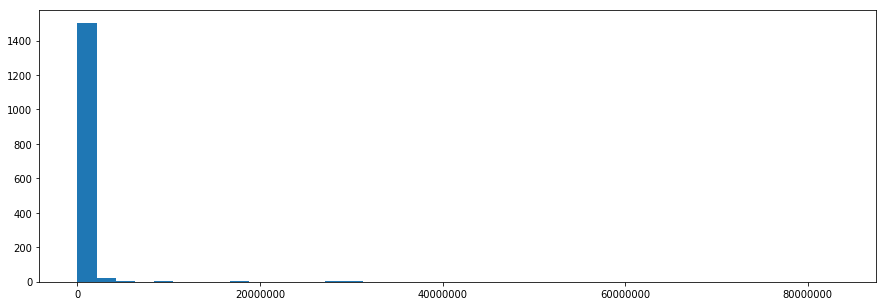

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15, h=5)

# bins is the most important parameter here - How many intervals is the data split into
ax.hist(sk_projects['Suma[EUR]'], bins=40)
ax.ticklabel_format(style='plain')
plt.show()

The highest subsidy is around 83 million EUR. Most of the subsidies are between 0 and 2 millions

Let's check the projects with subsidies over 2 millions

In [18]:
projects_over_2M = sk_projects.loc[sk_projects['Suma[EUR]'] > 2000000]

projects_over_2M.describe()

Project_ID   Suma[EUR]  nove prac. miesta  pocet zapojenych  \
count          51.00       51.00               7.00             44.00   
mean  27119577140.31 14049191.38           10412.86          35273.02   
std      12384367.58 17340732.27           14855.33         135475.59   
min   27110130001.00  2008042.65               0.00              0.00   
25%   27110130017.50  3244817.63             398.00              0.00   
50%   27110230008.00  5708766.53            4574.00              0.00   
75%   27125280001.50 18743340.50           13141.00           4137.50   
max   27140130192.00 83348257.32           41238.00         665026.00   

       pocet vzdelav.  pocet social. sluz.  pocet uspesne umiest.  
count            8.00                 0.00                   5.00  
mean          3538.00                  nan                7357.80  
std           5491.70                  nan                7541.70  
min             68.00                  nan                   0.00  
25%            640.50                  nan                   0.00  
50%            807.50                  nan                8411.00  
75%           3420.25                  nan               10668.00  
max          14718.00                  nan               17710.00

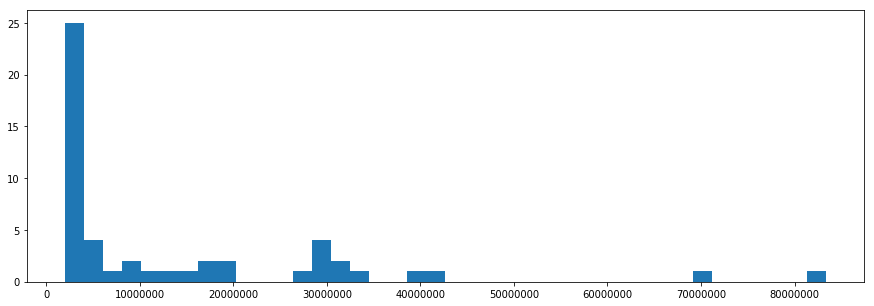

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15, h=5)

ax.hist(projects_over_2M['Suma[EUR]'], bins=40)
ax.ticklabel_format(style='plain')
plt.show()

Which subjects applied for the most subsidies?

> We can use `.value_counts()` method to determine how many times a value appers in a column

In [20]:
sk_projects['Subjekt'].value_counts().head(20)

UPSVaR                                                        40
Centrum vzdelávania MPSVaR SR                                 16
Mesto Prešov                                                   6
Štatistický úrad                                               4
Mesto Sečovce                                                  4
Úrad vlády SR                                                  4
PSI Jazmín                                                     4
Mesto Krompachy                                                4
MV SR                                                          4
Hlinné                                                         4
Human For Human                                                3
Michalovce                                                     3
Varhaňovce                                                     3
Združenie príbuzných a priateľov duševne chorých OPORA G+N     3
MAJÁK, občianske združenie                                     3
Obec Žehra               

We can do the same for the beneficiary

In [21]:
sk_projects['Nazov prijimatela'].value_counts().head(20)


Ústredie práce, sociálnych vecí a rodiny                                         35
Centrum vzdelávania Ministerstva práce, sociálnych vecí a rodiny SR              15
Mesto Prešov                                                                      6
Úrad vlády Slovenskej republiky                                                   4
Mesto Sečovce                                                                     4
Ministerstvo vnútra SR                                                            4
Obec Hlinné                                                                       4
Mesto Krompachy                                                                   4
Ústredie práce, sociálnych vecí a rodiny                                          4
Štatistický úrad Slovenskej republiky                                             4
Partnerstvo sociálnej inklúzie Jazmín                                             4
Obec Ihľany                                                                 

**Normalize the value of subsidies**

In [22]:
sum_of_projects = sk_projects['Suma[EUR]'].sum()

In [23]:
sk_projects['normalized_support'] = sk_projects['Suma[EUR]'] / sum_of_projects

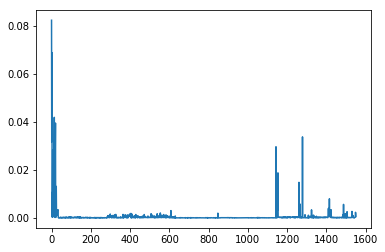

In [24]:
fig, ax = plt.subplots()

ax.plot(sk_projects['normalized_support'])

List all districts, which were applying for subsidy

In [25]:
sk_projects['Okres'].unique()

array(['Okres Bratislava', 'Okres Bardejov', 'Okres Trebišov',
       'Okres Banská Bystrica', 'Okres Bratislava I', 'Okres Rožňava',
       'Okres Brezno', 'Okres Revúca', 'Okres Spišská Nová Ves',
       'Okres Rimavská Sobota', 'Okres Veľký Krtíš', 'Okres Humenné',
       'Okres Nové Zámky', 'Okres Košice', 'Okres Prešov',
       'Okres Vranov nad Topľou', 'Okres Košice II', 'Okres Levice',
       'Okres Galanta', 'Okres Gelnica', 'Okres Šaľa', 'Okres Poprad',
       'Okres Považská Bystrica', 'Okres Púchov', 'Okres Lučenec',
       'Okres Dunajská Streda', 'Okres Michalovce', 'Okres Košice IV',
       'Okres Martin', 'Okres Nitra', 'Okres Prievidza', 'Okres Žilina',
       'Okres Snina', 'Okres Košice I', 'Okres Liptovský Mikuláš',
       'Okres Piešťany', 'Okres Komárno', 'Okres Čadca',
       'Okres Ružomberok', 'Okres Trenčín', 'Okres Skalica',
       'Okres Zvolen', 'Okres Trnava', 'Okres Bytča', 'Okres Ilava',
       'Okres Turčianske Teplice', 'Okres Svidník', 'Okres Topoľčan

The GPS column is storing the coordinates as string values, we need to split this column into two numeric columns (latitude, longitude)

In [26]:
sk_projects['GPS'].head(10)

0    48.147348,17.116872
1    48.147330,17.116522
2    48.147238,17.116591
3     48.19821,17.137918
4    48.147239,17.116692
5     48.19838,17.137118
6    48.147225,17.116891
7    48.198445,17.137518
8    48.147325,17.116375
9    48.147327,17.116825
Name: GPS, dtype: object

In [27]:
extracted_coords = sk_projects['GPS'].str.split(',', expand=True).astype(float)
extracted_coords.head()

0     1
0 48.15 17.12
1 48.15 17.12
2 48.15 17.12
3 48.20 17.14
4 48.15 17.12

In [28]:
# rename the columns to gps_lat and gps_lon

extracted_coords = extracted_coords.rename(columns={0: 'gps_lat', 1: 'gps_lon'})

In [29]:
# We need to join the origin dataframe with the extracted coordinates

sk_projects = sk_projects.join(extracted_coords)

> **Important**: All of the above done analysis showed us all applied projects, some of them are still under progress. We need to filter out the finished projects

In [31]:
sk_projects.head()

Project_ID                                  kratky nazov  \
0  27110130001               Podpora zamestn. uch o.zamestn.   
1  27110130002        Podp. zamestn. obč. so zdrav. postihn.   
2  27110130003            Aktivácia uchádzačov o zamestnanie   
3  27110130004       Národný projekt XXI-2 Ukazovatele a sys   
4  27110130005  Zlepšenie a zvýšenie dostupnosti služieb zam   

                         Subjekt Stav projektu   Suma[EUR]                VUC  \
0                         UPSVaR  v realizácii 83348257.32  Bratislavský kraj   
1                         UPSVaR  v realizácii 32118352.91  Bratislavský kraj   
2                         UPSVaR  v realizácii 69707229.63  Bratislavský kraj   
3  Centrum vzdelávania MPSVaR SR  v realizácii   346034.16  Bratislavský kraj   
4                         UPSVaR  v realizácii 10795747.00  Bratislavský kraj   

              Okres                                  Obec   ZACIATOK  \
0  Okres Bratislava    Bratislava-Nové Mesto, Špitálska 8   1.3.2008   
1  Okres Bratislava    Bratislava-Nové Mesto, Špitálska 8   1.3.2008   
2  Okres Bratislava    Bratislava-Nové Mesto, Špitálska 8   1.4.2008   
3  Okres Bratislava  Bratislava-Nové Mesto, Pekná cesta 6   1.5.2009   
4  Okres Bratislava    Bratislava-Nové Mesto, Špitálska 8  21.5.2009   

       KONIEC   ...                       Pravna forma                  GPS  \
0   31.8.2012   ...      Štátna rozpočtová organizácia  48.147348,17.116872   
1  31.12.2012   ...      Štátna rozpočtová organizácia  48.147330,17.116522   
2   30.6.2013   ...      Štátna rozpočtová organizácia  48.147238,17.116591   
3   15.8.2010   ...     Štátna príspevková organizácia   48.19821,17.137918   
4   31.8.2012   ...      Štátna rozpočtová organizácia  48.147239,17.116692   

  nove prac. miesta pocet zapojenych  pocet vzdelav.  pocet social. sluz.  \
0          41238.00        134908.00             nan                  nan   
1           4574.00         35404.00             nan                  nan   
2               nan        617138.00             nan                  nan   
3               nan             0.00          128.00                  nan   
4               nan             0.00             nan                  nan   

   pocet uspesne umiest.  normalized_support  gps_lat  gps_lon  
0                    nan                0.08    48.15    17.12  
1               17710.00                0.03    48.15    17.12  
2                    nan                0.07    48.15    17.12  
3                    nan                0.00    48.20    17.14  
4                    nan                0.01    48.15    17.12  

[5 rows x 22 columns]

In [32]:
sk_projects['Stav projektu'].unique()

array(['v realizácii', 'riadne ukončený', 'mimoriadne ukončený'], dtype=object)

In [48]:
sk_success_projects = sk_projects.loc[sk_projects['Stav projektu'] == 'riadne ukončený']

## Visualizing the distribution of subsidies

**We need to aggregate the subsidies based on the districts**

How to achieve this?

- Group the dataframe based on the districs
- apply aggregation function on each of the groups. Using `.groupby().agg()`:
    - sum the values of `Suma[EUR]` for each project in the group
    - Calculate the mean for latitude and longitude for each project in the group
    - Calculate the number of projects in the group

> Calculating average of latitude and longitude is just a trick, but its good enough for the data visualization

In [34]:
aggregation_map = {
    'Suma[EUR]': 'sum',
    'Project_ID': 'count',
    'gps_lat': 'mean',
    'gps_lon': 'mean'
}

In [35]:
district_projects = sk_success_projects.groupby('Okres').agg(aggregation_map)

In [36]:
district_projects.rename(columns={'Project_ID': 'Project_count'}, inplace=True)

In [37]:
# Sort the resulting dataset based on the amount of the subsidy

district_projects.sort_values('Suma[EUR]', ascending=False, inplace=True)

In [38]:
district_projects.head(20)

Suma[EUR]  Project_count  gps_lat  gps_lon
Okres                                                               
Okres Bratislava        30221953.04              8    48.14    17.12
Okres Prešov             2783063.98             31    48.95    21.15
Okres Vranov nad Topľou  1526036.13             23    48.92    21.64
Okres Trenčín            1490763.98              9    48.89    18.04
Okres Bardejov           1463130.90             21    49.31    21.21
Okres Banská Bystrica    1419673.38             13    48.74    19.14
Okres Lučenec            1252547.49             12    48.38    19.81
Okres Rimavská Sobota    1190197.88             24    48.39    20.07
Okres Kežmarok           1115797.53             15    49.17    20.52
Okres Galanta             941194.47              5    48.15    17.68
Okres Zvolen              930094.69              8    48.61    19.27
Okres Snina               923476.23              6    48.98    22.19
Okres Spišská Nová Ves    758097.50              9    48.94    20.66
Okres Trnava              726832.17              4    48.40    17.57
Okres Púchov              708055.13              2    49.13    18.32
Okres Nitra               687123.11              8    48.40    18.38
Okres Martin              632985.80              7    49.08    18.93
Okres Stará Ľubovňa       627926.51              8    49.28    20.75
Okres Poprad              566889.57              5    48.98    20.60
Okres Dolný Kubín         559644.40              4    49.21    19.30

**Homework**

As you can see, there is some kind of a discrepancy for Bratislava

- There is a district called 'Okres Bratislava'
- There are districts with names: 'Okres Bratislava I', 'Okres Bratislava II', 'Okres Bratislava III', 'Okres Bratislava IV', 'Okres Bratislava V'

- The sum of subsidies in 'Okres Bratislava I', 'Okres Bratislava II', 'Okres Bratislava III', 'Okres Bratislava IV', 'Okres Bratislava V' doesn't equal to the subsidies in 'Okres Bratislava' (Check the following two cells)

So the homework will be to join all these districts into one big district

In [39]:
district_projects.loc['Okres Bratislava']['Suma[EUR]']

30221953.040000003

In [40]:
other_ba_columns = ['Okres Bratislava I', 'Okres Bratislava II', 'Okres Bratislava III', 
                   'Okres Bratislava IV', 'Okres Bratislava V']
district_projects.loc[other_ba_columns, 'Suma[EUR]'].sum()



1324579.0900000001

Let's create a new column which shows the theoretical subsidy / project for the given district

In [41]:
district_projects['Suma / project'] = (district_projects['Suma[EUR]'] / district_projects['Project_count']).astype(float)

In [42]:
district_projects.sort_values('Suma / project', ascending=False).head(20)

Suma[EUR]  Project_count  gps_lat  gps_lon  \
Okres                                                                  
Okres Bratislava        30221953.04              8    48.14    17.12   
Okres Púchov              708055.13              2    49.13    18.32   
Okres Bratislava III      265600.00              1    48.19    17.19   
Okres Košice IV           240431.19              1    48.72    21.25   
Okres Považská Bystrica   199094.37              1    49.12    18.44   
Okres Námestovo           193682.00              1    49.37    19.19   
Okres Galanta             941194.47              5    48.15    17.68   
Okres Prievidza           368497.49              2    48.75    18.69   
Okres Trnava              726832.17              4    48.40    17.57   
Okres Trenčín            1490763.98              9    48.89    18.04   
Okres Snina               923476.23              6    48.98    22.19   
Okres Malacky             150440.62              1    48.44    17.02   
Okres Nové Zámky          141427.67              1    48.09    18.06   
Okres Dolný Kubín         559644.40              4    49.21    19.30   
Okres Čadca               139251.68              1    49.37    18.48   
Okres Piešťany            274983.39              2    48.61    17.77   
Okres Komárno             130049.13              1    47.76    18.13   
Okres Ilava               122202.50              1    48.94    18.14   
Okres Revúca              484092.75              4    48.68    20.15   
Okres Košice II           359906.66              3    48.69    21.21   

                         Suma / project  
Okres                                    
Okres Bratislava             3777744.13  
Okres Púchov                  354027.57  
Okres Bratislava III          265600.00  
Okres Košice IV               240431.19  
Okres Považská Bystrica       199094.37  
Okres Námestovo               193682.00  
Okres Galanta                 188238.89  
Okres Prievidza               184248.74  
Okres Trnava                  181708.04  
Okres Trenčín                 165640.44  
Okres Snina                   153912.71  
Okres Malacky                 150440.62  
Okres Nové Zámky              141427.67  
Okres Dolný Kubín             139911.10  
Okres Čadca                   139251.68  
Okres Piešťany                137491.70  
Okres Komárno                 130049.13  
Okres Ilava                   122202.50  
Okres Revúca                  121023.19  
Okres Košice II               119968.89

In [43]:
district_projects.describe()

Suma[EUR]  Project_count  gps_lat  gps_lon  Suma / project
count       69.00          69.00    69.00    69.00           69.00
mean    917783.46           5.64    48.68    19.43       154827.83
std    3610319.60           5.80     0.39     1.58       446383.60
min      27258.85           1.00    47.76    17.02        27258.85
25%     191077.68           2.00    48.39    18.14        63692.56
50%     359906.66           4.00    48.72    19.27        87744.44
75%     627926.51           7.00    48.98    20.76       122202.50
max   30221953.04          31.00    49.37    22.19      3777744.13

By looking at the dataset, we can't tell too much about the distribution of the subsidies. Visualizing the dataset over the map Slovakia can be more intuitive. We can use the `basemap` toolkit to do it

In [44]:
from mpl_toolkits.basemap import Basemap

In [45]:
lat = district_projects['gps_lat'].values
lon = district_projects['gps_lon'].values
suma_eur = district_projects['Suma[EUR]'].values
suma_eur_norm = (suma_eur / max(suma_eur)) * 4000
suma_per_project = district_projects['Suma / project'].values
suma_per_project_norm = (suma_per_project / max(suma_per_project)) * 4000

/home/patex1987/anaconda3/envs/data36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/patex1987/anaconda3/envs/data36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


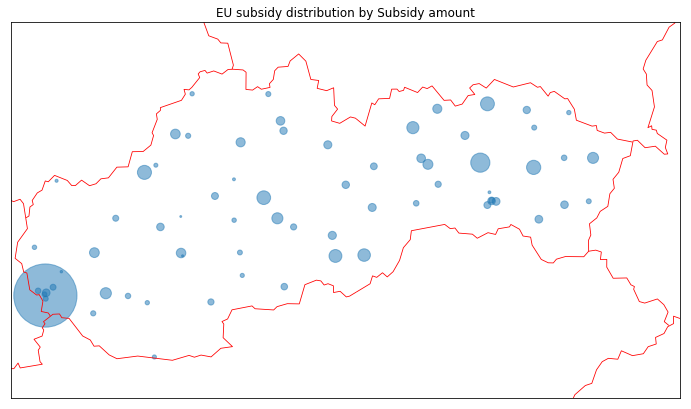

In [54]:
# c,l,i,h,f

fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',
            llcrnrlat=47.5,
            urcrnrlat=49.8,
            llcrnrlon=16.8,
            urcrnrlon=23,
            resolution='i')
m.drawcountries(linewidth=0.8, color='r')
m.scatter(lon, lat, latlon=True, s=suma_eur_norm,
          cmap='Reds', alpha=0.5)
plt.title('EU subsidy distribution by Subsidy amount')
plt.show()

/home/patex1987/anaconda3/envs/data36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/patex1987/anaconda3/envs/data36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


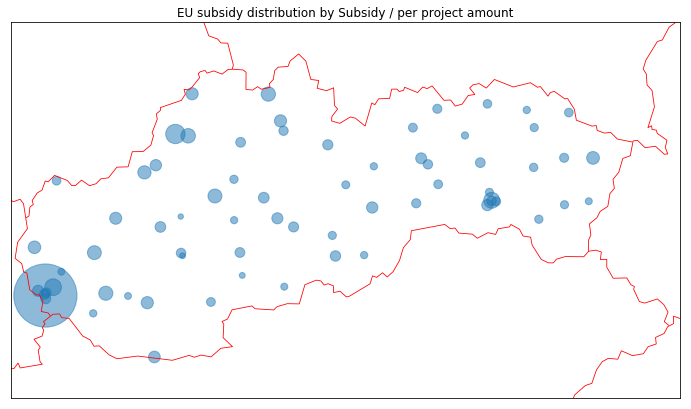

In [47]:
# c,l,i,h,f

fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=47.5,urcrnrlat=49.8,llcrnrlon=16.8,urcrnrlon=23,resolution='i')
m.drawcountries(linewidth=0.8, color='r')
m.scatter(lon, lat, latlon=True, s=suma_per_project_norm,
          cmap='Reds', alpha=0.5)
plt.title('EU subsidy distribution by Subsidy / per project amount')
plt.show()